#Descrição do Desafio

 Uma empresa de RH quer contratar um funcionário que julgam ser ideal para a empresa, porém quando é perguntado a pretenção salarial do canditato ele diz que gostaria de receber a mesma quantidade que ganhava em seu antigo emprego R$160.000,00/ano. Neste desafio você deverá mostrar se o salário pedido condiz ou não com o mercado sabendo que o nível dele é 6.5 .

Verificando com a regressão Polinomial

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
dataset= pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

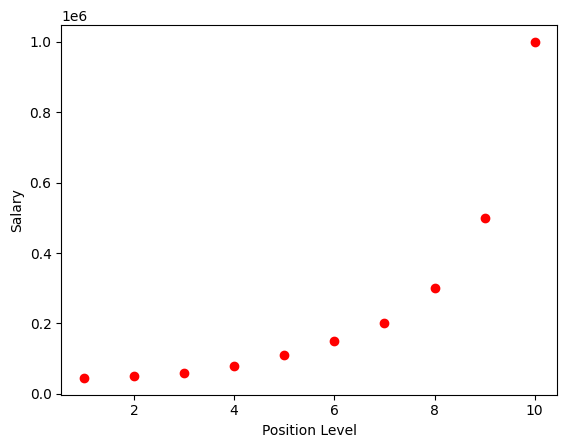

In [61]:
# Plotando os dados em gráfico

plt.scatter(x, y, color = 'red')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Verificando com a Regressão Polinomial

In [62]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree= 5 )
x_poly = poly_reg.fit_transform(x) 
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y) 

LinearRegression()

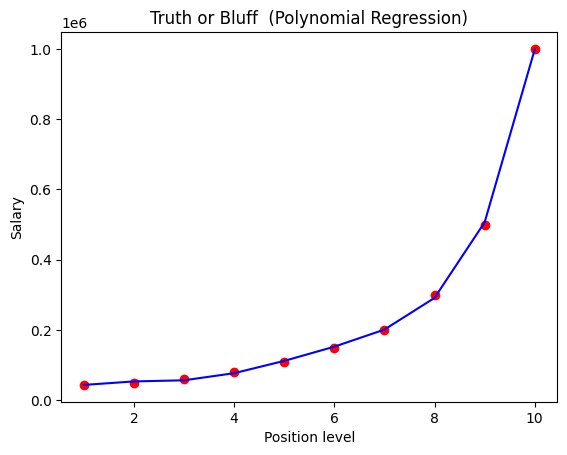

In [63]:
# Visualizando a linha de regressão

plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff  (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [64]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([174878.07765173])

Verificando com SRV

In [65]:
y = y.reshape(len(y),1)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)


In [66]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

c:\Users\Usuário\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

C:\Users\Usuário\AppData\Local\Temp\ipykernel_10792\3390651470.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x), max(x), 0.01)


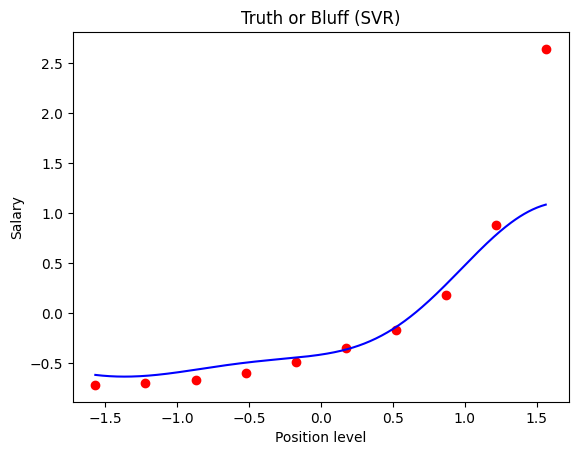

In [67]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [68]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Verificando com DECISION TREE REGRESSION

In [69]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)


DecisionTreeRegressor(random_state=0)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_10792\4189193673.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x), max(x), 0.01)


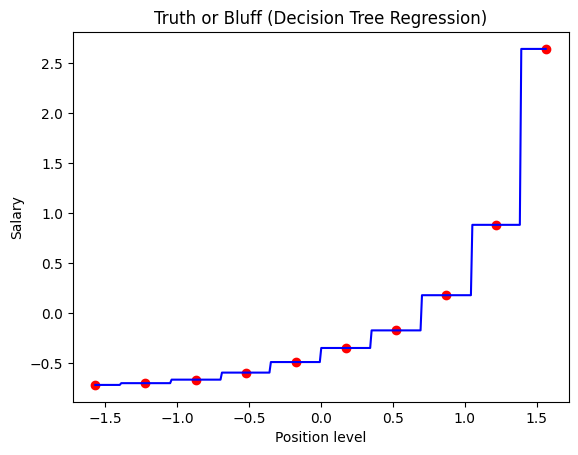

In [70]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [71]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[200000.]])

Verificando com RANDOM FOREST REGRESSION

In [72]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor.fit(x, y)

c:\Users\Usuário\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=500, random_state=0)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_10792\2345051919.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x), max(x), 0.01)


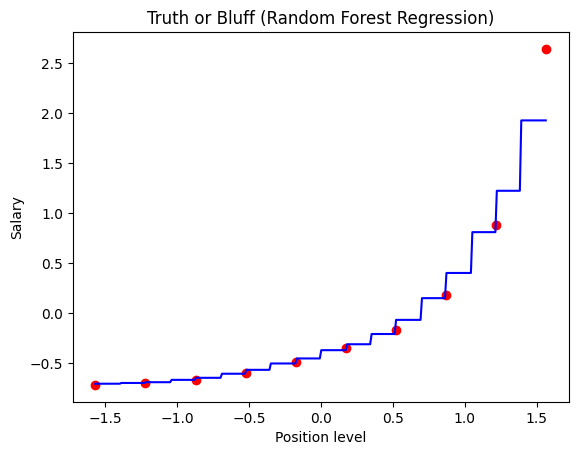

In [73]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [74]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[188020.]])

#Conclusão

Dessa forma vimos que em todos os métodos estatísticos que a média de salário para alguém com o nível 6.5 é superior a R$160000,00/ano, sendo assim, o candidato está dizendo a verdade e é interessante para a empresa contratar.